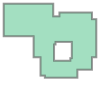

In [10]:
from FrontierExploration.preprocessing.layout.syntetic import SynteticWorld


world = SynteticWorld("testing", "./", 5, n_in_rectangles=2, n_points=0)
world.wall_polygon